In [46]:
import os
import cv2
import time
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

In [23]:
img_path = "../test_cases/image_0.png"
mask_path = "../test_cases/warped_cloth_mask_0.png"
cloth_path = "../test_cases/cloth_0.png"

In [24]:
img = Image.open(img_path)
mask = Image.open(mask_path)
cloth = Image.open(cloth_path)

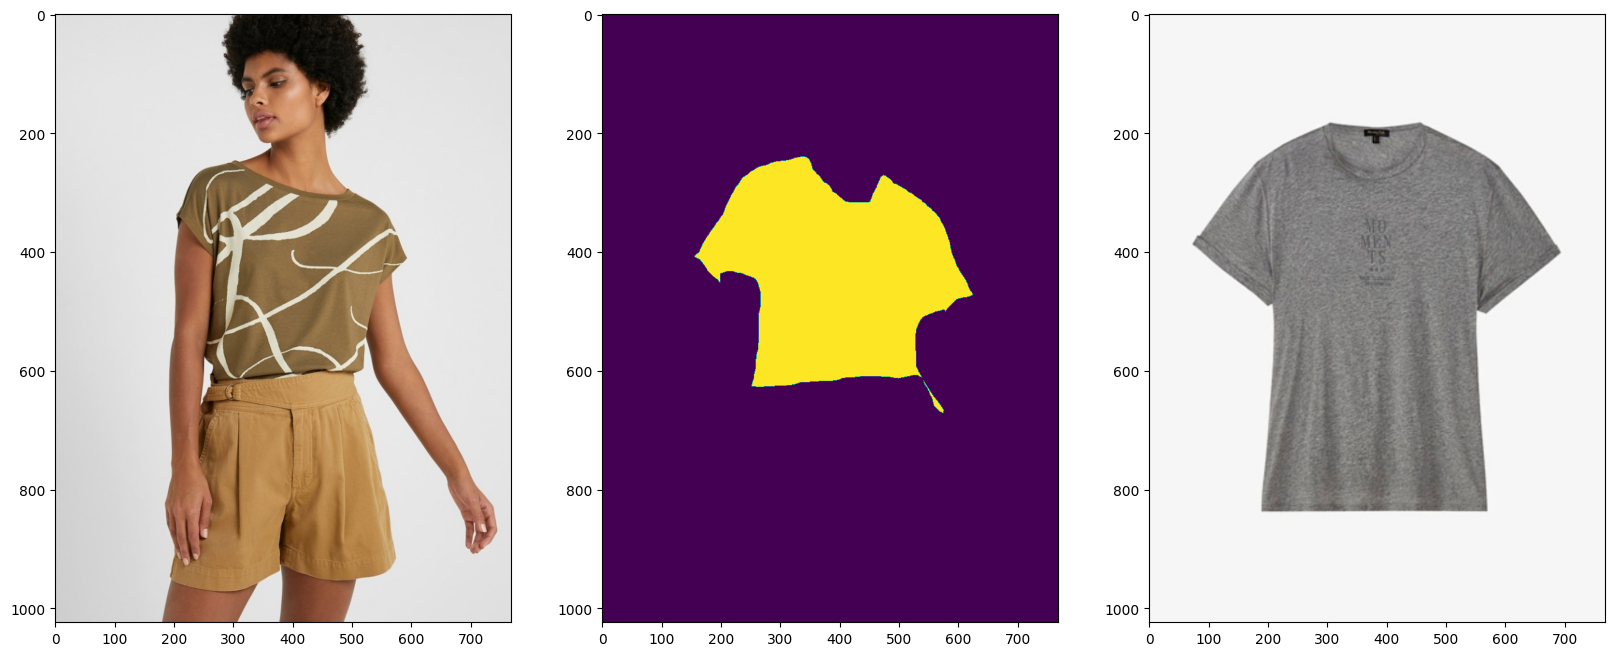

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(20, 16))
ax[0].imshow(img)
ax[1].imshow(mask)
ax[2].imshow(cloth)

In [29]:
np.unique(mask)

array([  0, 255], dtype=uint8)

In [31]:
np.array(img).shape, np.array(mask).shape, np.array(cloth).shape

((1024, 768, 3), (1024, 768), (1024, 768, 3))

In [87]:
!rm -rf ../test_cases_pbe
os.makedirs("../test_cases_pbe", exist_ok=True)

In [118]:
ex = Image.open("/home/hlovatskyi/vton/dvton/external/Paint-by-Example/examples/mask/example_1.png")

In [132]:
for i in range(5):
    img_path = f"../test_cases/image_{i}.png"
    mask_path = f"../test_cases/warped_cloth_mask_{i}.png"
    cloth_path = f"../test_cases/cloth_{i}.png"
    
    img = Image.open(img_path)
    mask = Image.open(mask_path)
    cloth = Image.open(cloth_path)

    masked_img = np.array(img).copy()
    masked_img[np.array(mask) != 0] = 255
    
    img = img.resize((384, 512))
    cloth = cloth.resize((384, 512))
    mask = mask.resize((384, 512), Image.Resampling.NEAREST)
    masked_img = Image.fromarray(masked_img).resize((384, 512))
    

    masked_img.save(f"../test_cases_pbe/masked_image_{i}.png")
    img.save(f"../test_cases_pbe/image_{i}.png")
    cloth.save(f"../test_cases_pbe/cloth_{i}.png")
    mask.save(f"../test_cases_pbe/mask_{i}.png")

[  0 255]


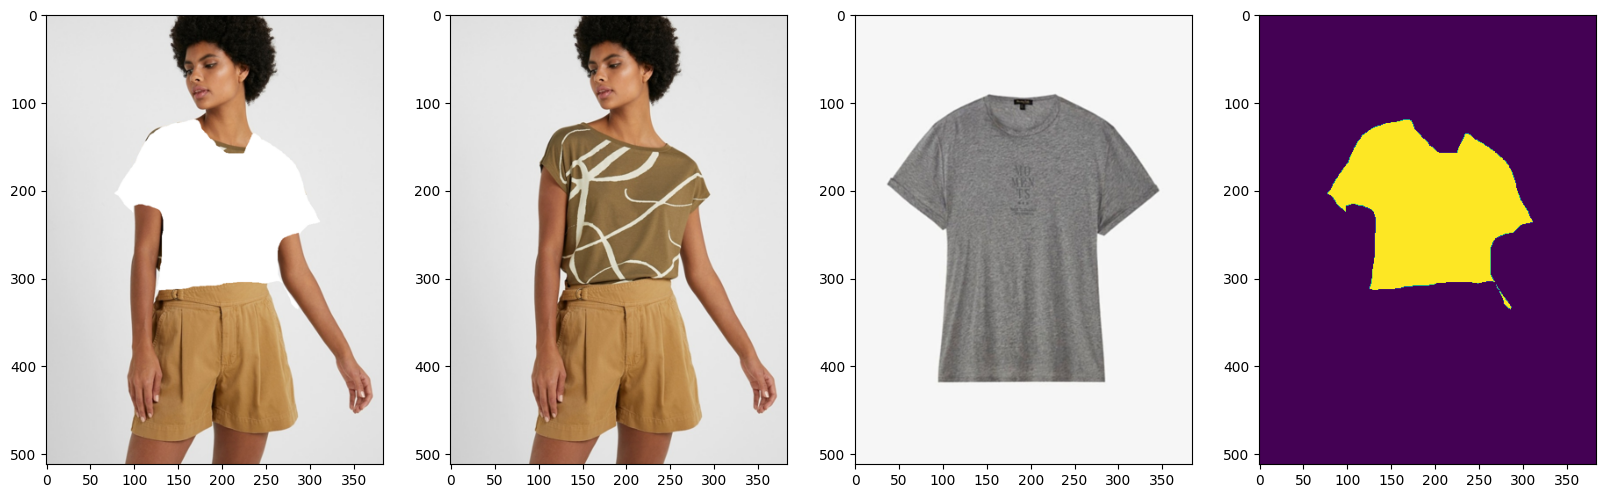

[  0 255]


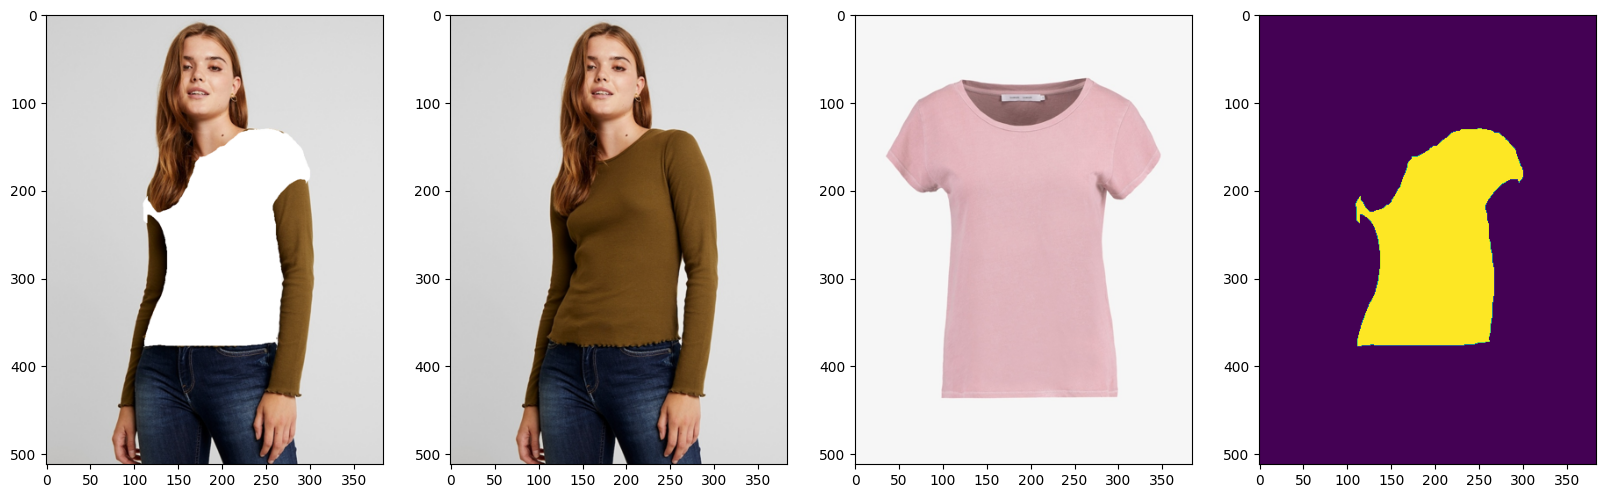

[  0 255]


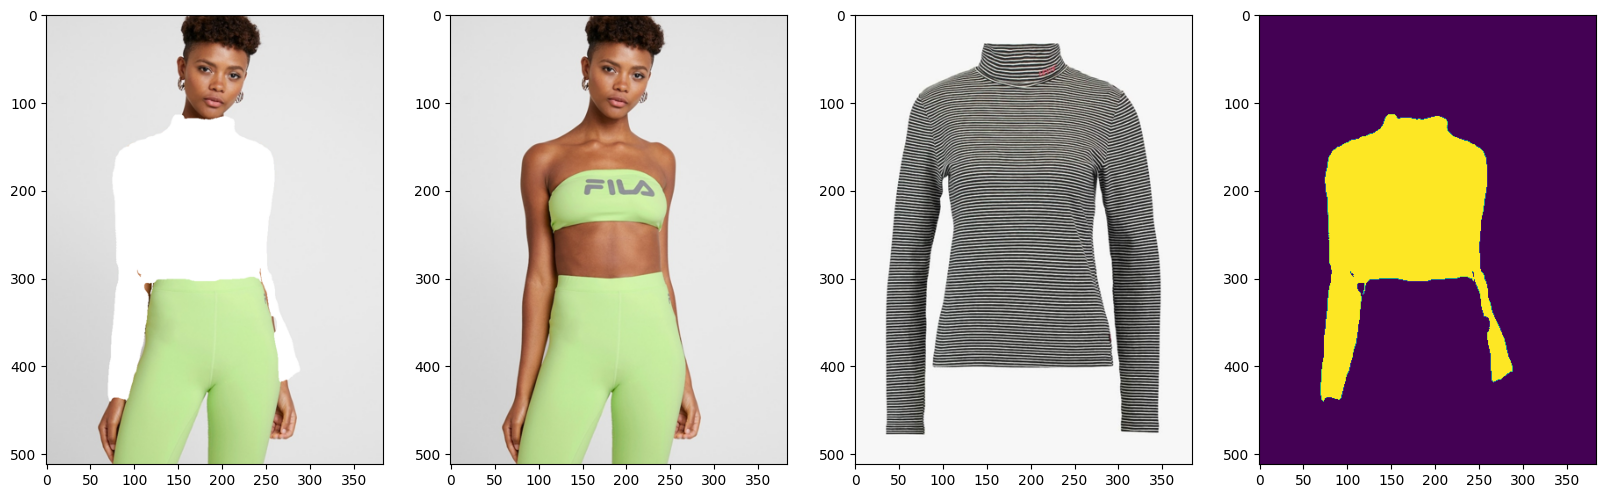

[  0 255]


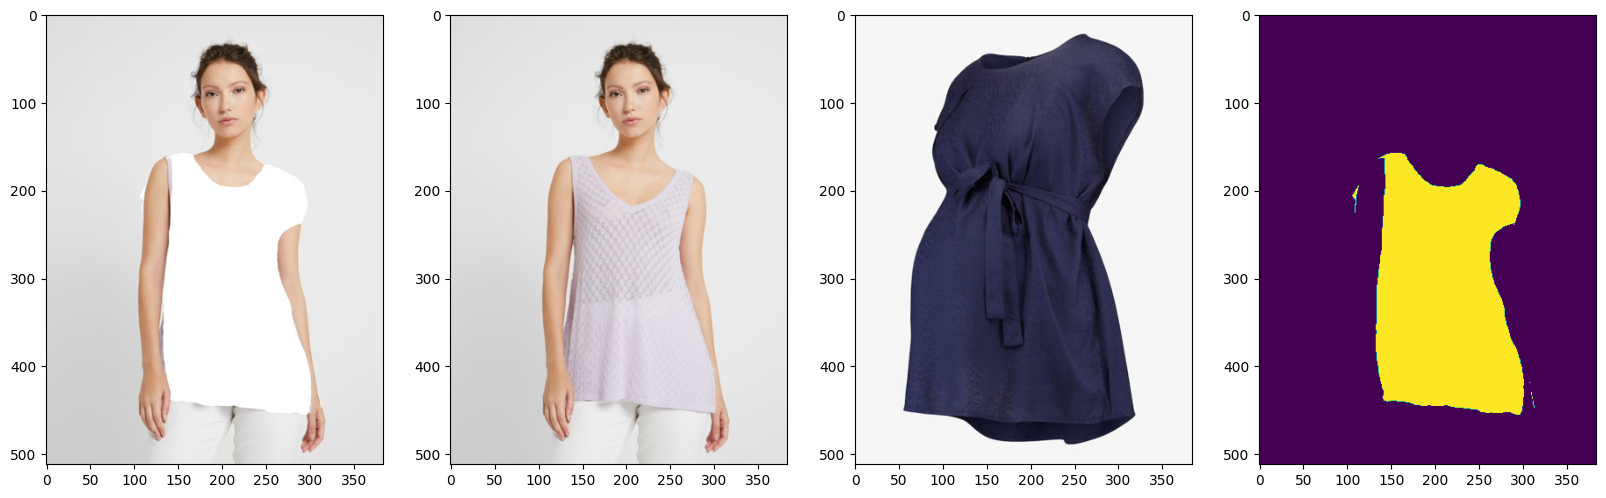

[  0 255]


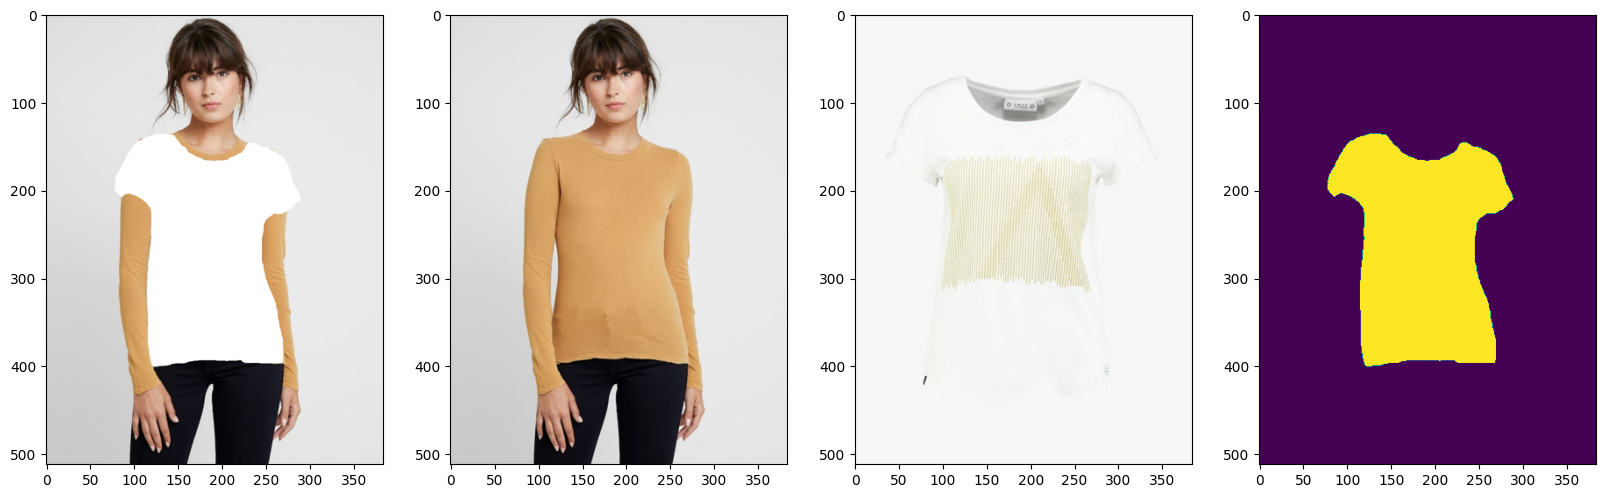

In [133]:
for i in range(5):
    masked_img = Image.open(f"../test_cases_pbe/masked_image_{i}.png")
    img = Image.open(f"../test_cases_pbe/image_{i}.png")
    cloth = Image.open(f"../test_cases_pbe/cloth_{i}.png")
    mask = Image.open(f"../test_cases_pbe/mask_{i}.png").convert("L")
    
    print(np.unique(mask))
    
    fig, ax = plt.subplots(1, 4, figsize=(20, 16))
    ax[0].imshow(masked_img)
    ax[1].imshow(img)
    ax[2].imshow(cloth)
    ax[3].imshow(mask)
    plt.show()

In [134]:
np.unique(mask)

array([  0, 255], dtype=uint8)

In [135]:
for i in range(5):
    start_time = time.time()

    !python ../external/Paint-by-Example/scripts/inference.py \
        --plms --outdir ../pbe_results \
        --config ../external/Paint-by-Example/configs/v1.yaml \
        --ckpt ../external/Paint-by-Example/checkpoints/model.ckpt \
        --image_path ../test_cases_pbe/image_{i}.png \
        --mask_path ../test_cases_pbe/mask_{i}.png \
        --reference_path ../test_cases_pbe/cloth_{i}.png \
        --H 512 \
        --W 384 \
        --seed 321 \
        --scale 5

    print("taken ", time.time() - start_time)

Global seed set to 321
Loading model from ../external/Paint-by-Example/checkpoints/model.ckpt
Global Step: 32613
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.54 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPVisionModel: ['text_model.encoder.layers.3.layer_norm2.bias', 'text_model.encoder.layers.9.self_attn.v_proj.weight', 'text_model.encoder.layers.4.self_attn.q_proj.bias', 'text_model.encoder.layers.0.layer_norm1.weight', 'text_model.encoder.layers.8.self_attn.v_proj.bias', 'text_model.encoder.layers.10.self_attn.v_proj.weight', 'text_model.encoder.layers.6.mlp.fc2.weight', 'text_model.encoder.layers.2.mlp.fc1.weight', 'text_model.encoder.layers.2.mlp.fc2.weight', 'text_projection.weight', 'text_model.encoder.layers.9.sel

Data shape for PLMS sampling is (1, 4, 64, 48)
Running PLMS Sampling with 50 timesteps
PLMS Sampler: 100%|█████████████████████████████| 50/50 [00:03<00:00, 15.65it/s]
Your samples are ready and waiting for you here: 
../pbe_results 
 
Enjoy.
taken  24.52985692024231
Global seed set to 321
Loading model from ../external/Paint-by-Example/checkpoints/model.ckpt
Global Step: 32613
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.54 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPVisionModel: ['text_model.embeddings.position_ids', 'text_model.encoder.layers.7.mlp.fc2.weight', 'text_model.encoder.layers.10.layer_norm1.weight', 'text_model.encoder.layers.6.layer_norm1.weight', 'text_model.encoder.layers.11.layer_norm2.bias', 'text_mod

Data shape for PLMS sampling is (1, 4, 64, 48)
Running PLMS Sampling with 50 timesteps
PLMS Sampler: 100%|█████████████████████████████| 50/50 [00:03<00:00, 15.66it/s]
Your samples are ready and waiting for you here: 
../pbe_results 
 
Enjoy.
taken  24.526625871658325
Global seed set to 321
Loading model from ../external/Paint-by-Example/checkpoints/model.ckpt
Global Step: 32613
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.54 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPVisionModel: ['text_model.encoder.layers.6.mlp.fc2.weight', 'text_model.encoder.layers.7.mlp.fc2.weight', 'text_model.encoder.layers.1.self_attn.out_proj.weight', 'text_model.encoder.layers.1.self_attn.k_proj.bias', 'text_model.encoder.layers.9.self_attn.q

Data shape for PLMS sampling is (1, 4, 64, 48)
Running PLMS Sampling with 50 timesteps
PLMS Sampler: 100%|█████████████████████████████| 50/50 [00:03<00:00, 15.64it/s]
Your samples are ready and waiting for you here: 
../pbe_results 
 
Enjoy.
taken  24.343214988708496
Global seed set to 321
Loading model from ../external/Paint-by-Example/checkpoints/model.ckpt
Global Step: 32613
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.54 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPVisionModel: ['text_model.encoder.layers.8.layer_norm1.bias', 'text_model.encoder.layers.7.layer_norm1.weight', 'text_model.encoder.layers.2.layer_norm1.bias', 'text_model.encoder.layers.10.mlp.fc1.bias', 'text_model.encoder.layers.4.self_attn.q_proj.bias'

Data shape for PLMS sampling is (1, 4, 64, 48)
Running PLMS Sampling with 50 timesteps
PLMS Sampler: 100%|█████████████████████████████| 50/50 [00:03<00:00, 15.61it/s]
Your samples are ready and waiting for you here: 
../pbe_results 
 
Enjoy.
taken  24.251625299453735
Global seed set to 321
Loading model from ../external/Paint-by-Example/checkpoints/model.ckpt
Global Step: 32613
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.54 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPVisionModel: ['text_model.encoder.layers.0.self_attn.out_proj.weight', 'text_model.encoder.layers.4.layer_norm2.bias', 'text_model.encoder.layers.8.mlp.fc1.bias', 'text_model.encoder.layers.8.self_attn.q_proj.bias', 'text_model.encoder.layers.6.self_attn.v

Data shape for PLMS sampling is (1, 4, 64, 48)
Running PLMS Sampling with 50 timesteps
PLMS Sampler: 100%|█████████████████████████████| 50/50 [00:03<00:00, 15.64it/s]
Your samples are ready and waiting for you here: 
../pbe_results 
 
Enjoy.
taken  25.11441135406494


In [136]:
!ls ../pbe_results/results

image_0_321.png  image_2_321.png  image_4_321.png
image_1_321.png  image_3_321.png


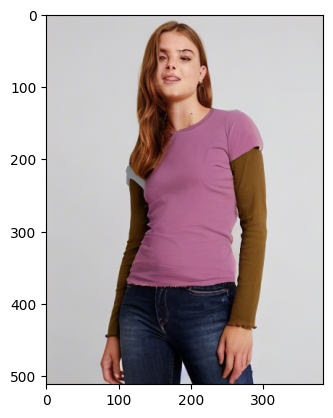

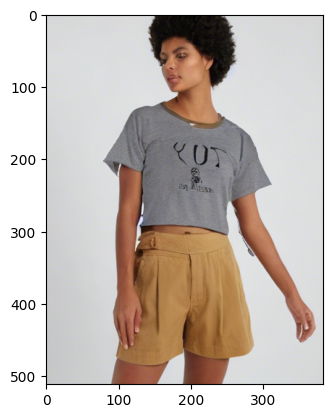

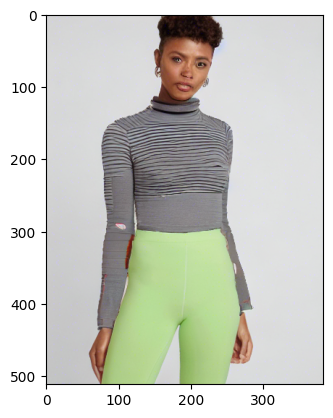

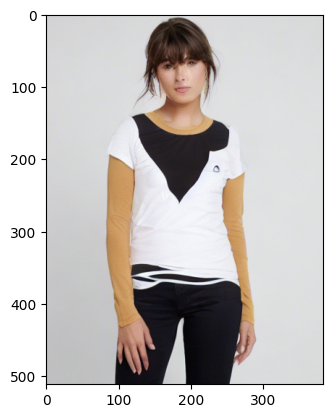

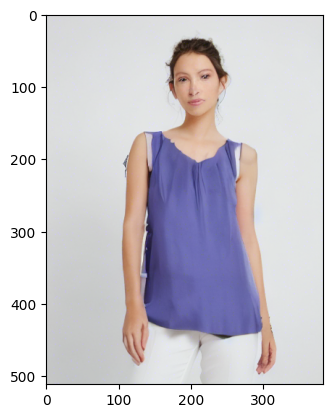

In [137]:
for img_path in os.listdir("../pbe_results/results"):
    img_path = os.path.join("../pbe_results", "results", img_path)
    
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()